In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Define dataset paths
train_dir = "dataset/Train"
valid_dir = "dataset/Valid"
test_dir = "dataset/Test"

# Data Preprocessing & Augmentation (Improves model performance)
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values
    rotation_range=20,      # Randomly rotate images
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True    # Flip images randomly
)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_data = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical'
)
valid_data = valid_datagen.flow_from_directory(
    valid_dir, target_size=(128, 128), batch_size=32, class_mode='categorical'
)
test_data = test_datagen.flow_from_directory(
    test_dir, target_size=(128, 128), batch_size=32, class_mode='categorical'
)

# Get class names (important for labeling)
class_names = list(train_data.class_indices.keys())
print(f"Class Labels: {class_names}")


Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Class Labels: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [3]:
# Load Pretrained MobileNetV2 Model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze pretrained layers

# Define Custom Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout to reduce overfitting
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Show Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Train Model
history = model.fit(
    train_data, validation_data=valid_data, epochs=10
)

# Save the trained model
model.save("models/potato_leaf_model.h5")
print("Model Saved Successfully 🎉")


C:\Users\Sai Arvind Arun\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 467ms/step - accuracy: 0.6264 - loss: 0.9400 - val_accuracy: 0.9067 - val_loss: 0.2482
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 405ms/step - accuracy: 0.8800 - loss: 0.2736 - val_accuracy: 0.9233 - val_loss: 0.2073
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 590ms/step - accuracy: 0.9281 - loss: 0.1795 - val_accuracy: 0.9467 - val_loss: 0.1332
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 607ms/step - accuracy: 0.9570 - loss: 0.1166 - val_accuracy: 0.9500 - val_loss: 0.1541
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 617ms/step - accuracy: 0.9604 - loss: 0.1086 - val_accuracy: 0.9567 - val_loss: 0.1098
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 626ms/step - accuracy: 0.9510 - loss: 0.1114 - val_accuracy: 0.9433 - val_loss: 0.1417
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 633ms/step - accuracy: 0.9715 - loss: 0.0871 - val_accuracy: 0.9733 - val_loss: 0.0961
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 609ms/step - accuracy: 0.9663 - loss: 0.0994 - val_accu

Model Saved Successfully 🎉


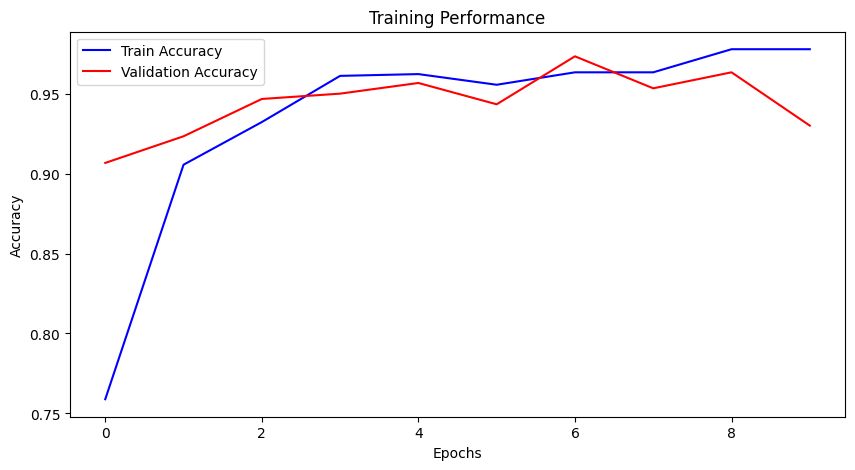

In [5]:
# Plot Training Performance
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Performance')
plt.legend()
plt.show()


In [6]:
# Evaluate on Test Data
loss, acc = model.evaluate(test_data)
print(f"🔍 Model Test Accuracy: {acc * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.9365 - loss: 0.1648
🔍 Model Test Accuracy: 93.33%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


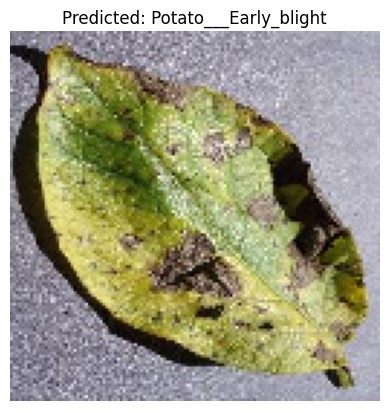

In [7]:
# Sample Prediction
from tensorflow.keras.preprocessing import image

def predict_sample(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()

# Test on a single image
predict_sample("C:/Users/Sai Arvind Arun/Desktop/certifications/internship/microsoft nd sap 2025 jan/potato_leaf_disease_detection_2/dataset/Test/Potato___Early_blight/7486e823-64f7-4e43-ab51-26261b077fc2___RS_Early.B 6785.JPG")  # Change path as needed
